In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
videopath = '/content/drive/MyDrive/eksperimen fisika/stopshot/stopshot-1-1.mp4'

In [ ]:
from scipy.signal import savgol_filter
from ultralytics import YOLO
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:

model = YOLO('/content/yolo11x-pose.pt')

In [ ]:
results = model.predict(source=videopath,
                        imgsz=(576,1024),
                        project='/content/drive/MyDrive/eksperimen fisika/stopshot',
                        name='stopshot-1-1-done',
                        half=True,
                        save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



KeyboardInterrupt: 

In [ ]:
for r in results:
  print(r.keypoints)

Streaming output truncated to the last 5000 lines.
         [1.0256e+03, 6.0937e+02, 8.1055e-01],
         [1.1203e+03, 5.1797e+02, 9.9512e-01],
         [1.0284e+03, 6.2437e+02, 2.8857e-01],
         [1.1409e+03, 5.5219e+02, 9.4238e-01],
         [1.0725e+03, 6.3984e+02, 8.4570e-01],
         [1.1091e+03, 6.2344e+02, 9.0771e-01],
         [1.0641e+03, 6.6937e+02, 2.0691e-02],
         [1.1212e+03, 6.5250e+02, 5.4504e-02],
         [1.0566e+03, 6.8203e+02, 2.3060e-03],
         [1.1297e+03, 6.7734e+02, 5.3635e-03]],

        [[8.4750e+02, 4.9453e+02, 9.6533e-01],
         [8.5594e+02, 4.8000e+02, 2.1240e-01],
         [8.4469e+02, 4.7156e+02, 9.8584e-01],
         [8.0156e+02, 4.7156e+02, 1.3069e-02],
         [7.7484e+02, 4.4672e+02, 9.9561e-01],
         [7.5469e+02, 5.5500e+02, 9.9463e-01],
         [5.8875e+02, 4.1180e+02, 9.9365e-01],
         [9.4734e+02, 6.5062e+02, 9.2676e-01],
         [3.2203e+02, 2.7656e+02, 9.5166e-01],
         [1.1512e+03, 6.3984e+02, 9.4873e-01],
       

KeyboardInterrupt: 

In [ ]:

# Define COCO keypoint names for better readability
keypoint_names = [
    'nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear',
    'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
    'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
    'left_knee', 'right_knee', 'left_ankle', 'right_ankle'
]

all_keypoints_data = []

for frame_idx, r in enumerate(results):
    # Each `r.keypoints.xy` contains keypoint coordinates for all detected persons in the current frame
    # Shape: (num_persons, num_keypoints, 2) -> (x, y)
    # Each `r.keypoints.conf` contains confidence scores for all detected persons in the current frame
    # Shape: (num_persons, num_keypoints)

    if r.keypoints is not None and r.keypoints.xyn is not None:
        # Ensure keypoints and their coordinates are present
        keypoints_xy = r.keypoints.xyn.cpu().numpy()  # Move to CPU and convert to NumPy array
        keypoints_conf = r.keypoints.conf.cpu().numpy() # Move to CPU and convert to NumPy array

        for person_id, (person_kps_xy, person_kps_conf) in enumerate(zip(keypoints_xy, keypoints_conf)):
            for kp_idx, (xy_coords, conf) in enumerate(zip(person_kps_xy, person_kps_conf)):
                x, y = xy_coords
                keypoint_name = keypoint_names[kp_idx]
                all_keypoints_data.append({
                    'frame': frame_idx,
                    'person_id': person_id,
                    'keypoint_id': kp_idx,
                    'keypoint_name': keypoint_name,
                    'x': x,
                    'y': y,
                    'confidence': conf
                })

# Create the pandas DataFrame
landmarks_df = pd.DataFrame(all_keypoints_data)

print(f"Extracted keypoint data for {landmarks_df['frame'].nunique()} frames and {landmarks_df['person_id'].nunique()} persons.")

Extracted keypoint data for 209 frames and 6 persons.


In [ ]:
# Display the first few rows of the DataFrame
display(landmarks_df.head())

,frame,person_id,keypoint_id,keypoint_name,x,y,confidence
0,0,0,0,nose,0.437744,0.439670,0.970703
1,0,0,1,left_eye,0.439941,0.425998,0.194336
2,0,0,2,right_eye,0.433105,0.420573,0.988770
3,0,0,3,left_ear,0.419922,0.421224,0.007259
4,0,0,4,right_ear,0.400879,0.403646,0.996094


In [ ]:
# Display information about the DataFrame to check data types and non-null counts
display(landmarks_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12172 entries, 0 to 12171
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   frame          12172 non-null  int64  
 1   person_id      12172 non-null  int64  
 2   keypoint_id    12172 non-null  int64  
 3   keypoint_name  12172 non-null  object 
 4   x              12172 non-null  float32
 5   y              12172 non-null  float32
 6   confidence     12172 non-null  float32
dtypes: float32(3), int64(3), object(1)
memory usage: 523.1+ KB


None

In [ ]:
# only consider relevant columns
positions = landmarks_df

positions = positions[(positions['keypoint_name'] == 'right_wrist')]
positions = positions[['frame', 'x', 'y']]
positions.head()

,frame,x,y
10,0,0.194702,0.458333
27,0,0.022217,0.546875
44,0,0.581055,0.537326
61,1,0.195923,0.457899
78,1,0.022156,0.547309


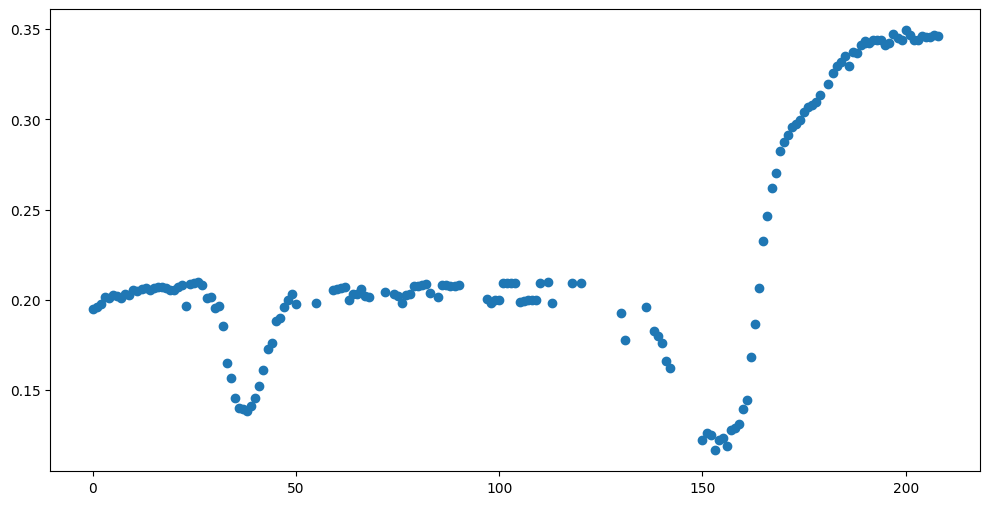

In [ ]:
# data cleaning




condition_frame = (175 < positions['frame']) & (positions['frame'] < 185)
condition_x = (positions['x'] < 0.29)
positions = positions[~(condition_x & condition_frame)]

condition_frame = (50 < positions['frame']) & (positions['frame'] < 130)
condition_x = (positions['x'] < 0.198)
positions = positions[~(condition_x & condition_frame)]

condition_frame = (positions['frame'] < 160)
condition_x = (positions['x'] > 0.21)
positions = positions[~(condition_x & condition_frame)]

# condition_frame = (positions['frame'] < 205)
# condition_x = (positions['x'] < 0.07)
# positions = positions[~(condition_x & condition_frame)]

# condition_frame = (positions['frame'] < 160)
# condition_x = (positions['x'] > 0.25)
# positions = positions[~(condition_x & condition_frame)]

positions = positions[(0.1 < positions['x']) & (positions['x'] < 0.4)]

plt.figure(figsize=(12, 6))
# plt.ylim(0, 0.8)
plt.scatter(positions['frame'], positions['x'])
plt.grid()


163
163


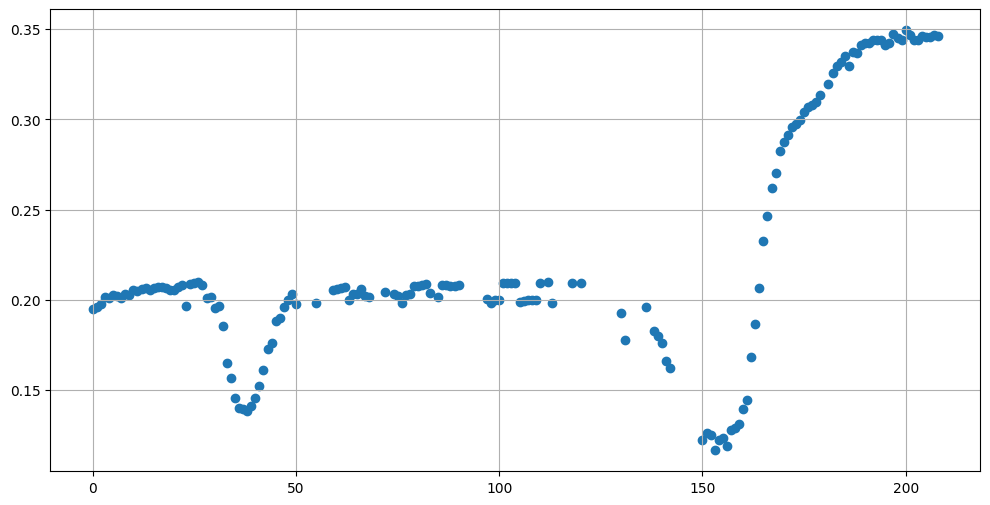

In [ ]:
positions = positions.drop_duplicates(subset=['frame'], keep='first')

frames = positions['frame']
position = positions['x']
# moving average on subset of position dataframe, then replace the old values of the subset
# position.iloc[:] = positions['x'].iloc[:].rolling(window=2).mean().fillna(method='bfill').fillna(method='ffill')
# position.iloc[:120] = positions['x'].iloc[:120].rolling(window=5).mean().fillna(method='bfill').fillna(method='ffill')
# position.iloc[170:200] = positions['x'].iloc[170:200].rolling(window=5).mean().fillna(method='bfill').fillna(method='ffill')

plt.figure(figsize=(12, 6))
plt.scatter(frames, position)
print(len(frames))
print(len(position))

163
163


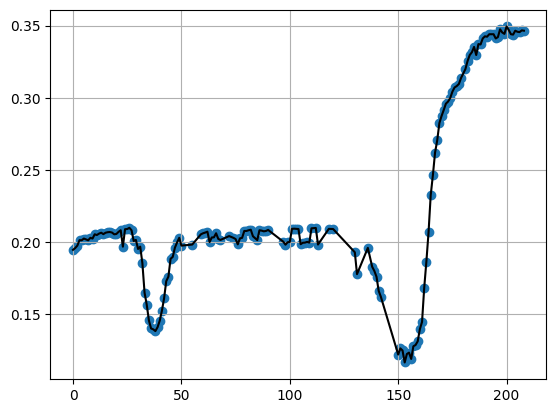

In [ ]:
# interpolating data, and plotting

print(len(frames))
print(len(position))

f = sp.interpolate.CubicSpline(frames, position)
splines = f(frames)

plt.scatter(frames, position)

plt.plot(frames, splines, 'black')

<Figure size 1200x600 with 0 Axes>

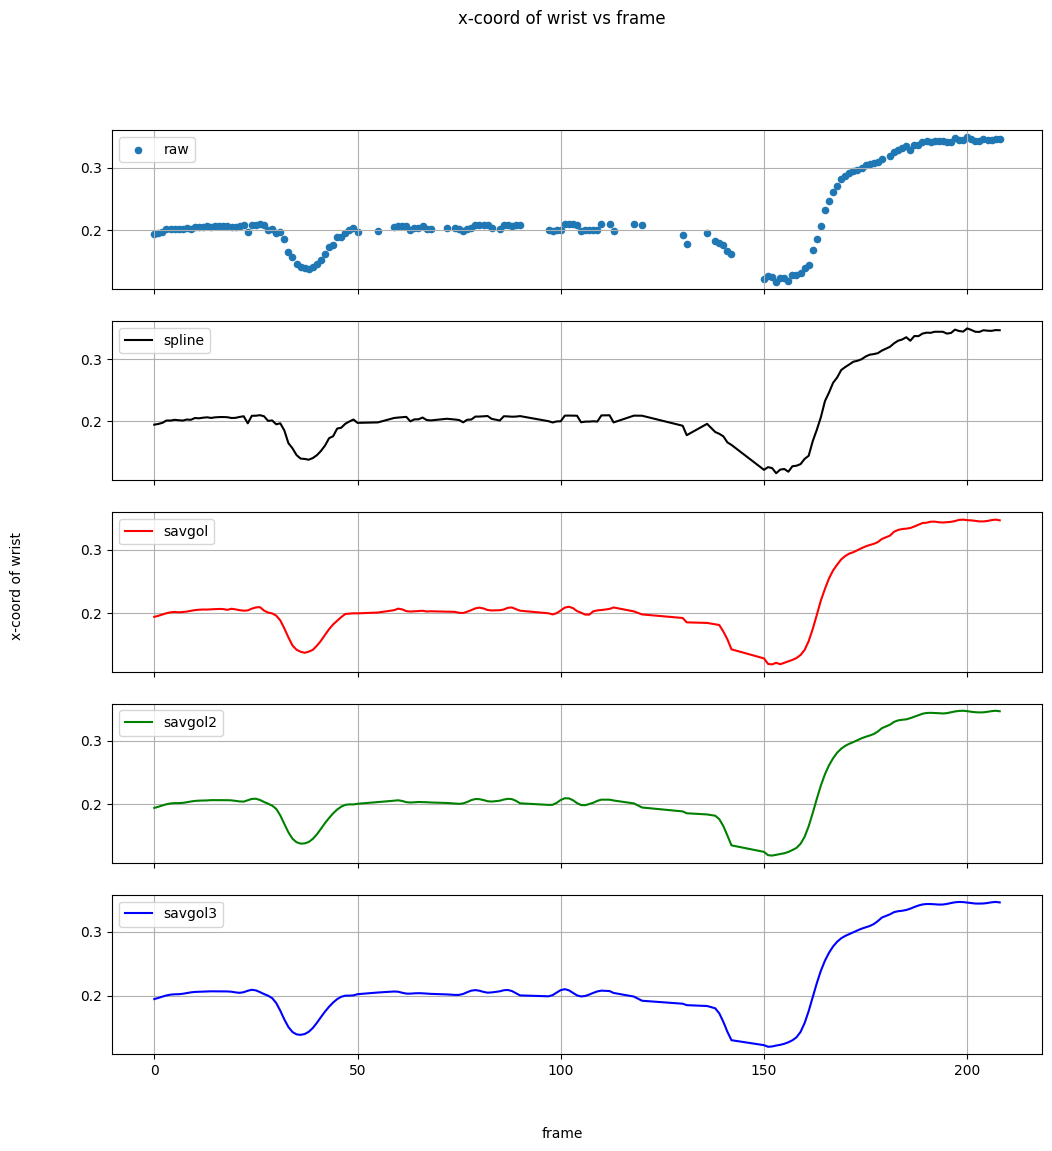

In [ ]:
# smoothing data, and plotting

smooth1 = savgol_filter(splines, 10, 4)
smooth2 = savgol_filter(smooth1, 10, 4)
smooth3 = savgol_filter(smooth2, 10, 7)

plt.figure(figsize=(12, 6))
plt.rcParams['axes.grid'] = True
fig, axes = plt.subplots(5, 1, figsize=(12, 12), sharex=True)
fig.suptitle('x-coord of wrist vs frame')



axes[0].scatter(positions['frame'], positions['x'], s=20, label='raw')
axes[1].plot(frames, splines, 'black', label='spline')
axes[2].plot(frames, smooth1, 'red', label='savgol')
axes[3].plot(frames, smooth2, 'green', label='savgol2')
axes[4].plot(frames, smooth3, 'blue', label='savgol3')


axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')
axes[4].legend(loc='upper left')

fig.text(0.04, 0.5, 'x-coord of wrist', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'frame', ha='center')

plt.savefig('/content/drive/MyDrive/eksperimen fisika/plot.png', dpi=300)
plt.show()


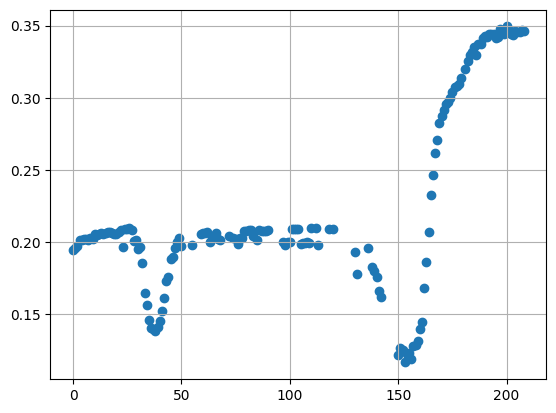

In [ ]:
# save 'positions' dataframe as csv with name drawshot-1
out_path = '/content/drive/MyDrive/eksperimen fisika/followshot/csv/followshot-2.csv'
df_save = {
    'frame': frames,
    'x': position
}
positions = pd.DataFrame(df_save)
plt.scatter(positions['frame'], positions['x'])
positions.to_csv(out_path, index=False)